In [1]:
import scapy
from scapy.all import *

# Load the contribution of someip
load_contrib("automotive.someip")


In [2]:
# Pandas library for data manipulation and analysis.
import pandas as pd 

# Keras, a Python interface for artificial neural networks.
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# The xml.etree.ElementTree module implements a simple and efficient API for parsing and creating XML data.
import xml.etree.ElementTree as ET
import io

#NumPy is a Python library used for working with arrays.
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

import seaborn as sns 

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

In [3]:
pkts = rdpcap(r"C:\Users\natashakhatib\Desktop\erroronerror\erroronerror\erroronerror11.pcap")
pkts[0]

<Ether  dst=02:1a:aa:aa:aa:aa src=02:5b:bb:bb:bb:bb type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=61 id=1 flags= frag=0 ttl=64 proto=udp chksum=0x66a9 src=10.1.0.5 dst=10.0.0.1 |<UDP  sport=30501 dport=30491 len=41 chksum=0xe66e |<SOMEIP  srv_id=0x1000 sub_id=METHOD_ID method_id=0x111 len=25 client_id=0x5 session_id=0x1 proto_ver=0x1 iface_ver=0x1 msg_type=REQUEST retcode=E_OK |<Raw  load='B14E4D70609860E18' |>>>>>

In [62]:
raw(pkts[0][Raw].load)

b'B14E4D70609860E18'

In [4]:
pkts[0].srv_id

4096

In [6]:
pkts[0].sub_id

0

In [7]:
pkts[0].method_id

273

In [8]:
pkts[0].len

61

In [9]:
pkts[0].client_id

5

In [10]:
pkts[0].session_id

1

In [11]:
pkts[0].proto_ver

1

In [12]:
pkts[0].iface_ver

1

In [13]:
pkts[0].msg_type

0

In [14]:
pkts[0].retcode

0

In [58]:
def constructpacketframe(file):
        timestamp=[]
        srv_id=[]
        method_id=[]
        length=[]
        client_id=[]
        session_id=[]
        proto_ver=[]
        iface_ver=[]
        msg_type=[]
        retcode=[]
        
        ip_src=[]
        ip_dst=[]
        proto=[]
        
        sport=[]
        dport=[]
        
        mac_src=[]
        mac_dst=[]
        
        
        data={}

        
        pkts = rdpcap(file)


        l=[] 
        for i in range(0,len(pkts)):
                if(i==0):
                    timestamp.append(0)
                else:
                    timestamp.append(pkts[i].time - pkts[0].time)
                
                srv_id.append(pkts[i][SOMEIP].srv_id)
                msg_type.append(pkts[i][SOMEIP].msg_type)
                client_id.append(pkts[i][SOMEIP].client_id)
                session_id.append(pkts[i][SOMEIP].session_id)
                iface_ver.append(pkts[i][SOMEIP].iface_ver)
                method_id.append(pkts[i][SOMEIP].method_id)
                length.append(pkts[i][SOMEIP].len)
                proto_ver.append(pkts[i][SOMEIP].proto_ver)
                retcode.append(pkts[i][SOMEIP].retcode)
                
                ip_src.append(pkts[i][IP].src)
                ip_dst.append(pkts[i][IP].dst)
                proto.append(pkts[i][IP].proto)
                
                
                sport.append(pkts[i][UDP].sport)
                dport.append(pkts[i][UDP].dport)
                
                mac_src.append(pkts[i][Ether].src)
                mac_dst.append(pkts[i][Ether].dst)
                
                
                
                
                data["timestamp"]=timestamp
                data["srv_id"]=srv_id
                data["msg_type"]=msg_type
                data["client_id"]=client_id
                data["session_id"]=session_id
                data["iface_ver"]=iface_ver
                data["method_id"]=method_id
                data["length"]=length
                data["proto_ver"]=proto_ver
                data["retcode"]=retcode
                
                data["ip_src"]=ip_src
                data["ip_dst"]=ip_dst
                data["proto"]=proto
                
                data["sport"]=sport
                data["dport"]=dport
                
                data["mac_src"]=mac_src
                data["mac_dst"]=mac_dst
                
                
                



                df=pd.DataFrame(data,columns=["timestamp","srv_id","msg_type","client_id","session_id","iface_ver","method_id","length","proto_ver","retcode","ip_src","ip_dst","proto","sport","dport","mac_src","mac_dst"])
        return df

In [59]:
packets=constructpacketframe(r"C:\Users\natashakhatib\Desktop\erroronerror\a_small.pcap")
packets

,timestamp,srv_id,msg_type,client_id,session_id,iface_ver,method_id,length,proto_ver,retcode,ip_src,ip_dst,proto,sport,dport,mac_src,mac_dst
0,0,12288,0,8,1,1,1,23,1,0,10.1.0.8,10.0.0.2,17,30501,30491,02:8b:bb:bb:bb:bb,02:2a:aa:aa:aa:aa
1,0.572143,12288,0,3,1,1,1,28,1,0,10.1.0.3,10.0.0.2,17,30501,30491,02:3b:bb:bb:bb:bb,02:2a:aa:aa:aa:aa
2,0.932741,12288,0,6,1,1,1,10,1,0,10.1.0.6,10.0.0.2,17,30501,30491,02:6b:bb:bb:bb:bb,02:2a:aa:aa:aa:aa
3,1.123375,12288,0,2,1,1,1,13,1,0,10.1.0.2,10.0.0.2,17,30501,30491,02:2b:bb:bb:bb:bb,02:2a:aa:aa:aa:aa
4,1.292030,4096,0,4,1,1,273,28,1,0,10.1.0.4,10.0.0.1,17,30501,30491,02:4b:bb:bb:bb:bb,02:1a:aa:aa:aa:aa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,120.541649,12288,128,7,20,1,1,22,1,0,10.0.0.2,10.1.0.7,17,30491,30501,02:2a:aa:aa:aa:aa,02:7b:bb:bb:bb:bb
560,121.790772,4096,0,5,19,1,273,17,1,0,10.1.0.5,10.0.0.1,17,30501,30491,02:5b:bb:bb:bb:bb,02:1a:aa:aa:aa:aa
561,122.937831,4096,0,5,20,1,273,21,1,0,10.1.0.5,10.0.0.1,17,30501,30491,02:5b:bb:bb:bb:bb,02:1a:aa:aa:aa:aa
562,125.569422,4096,128,5,20,1,273,24,1,0,10.0.0.1,10.1.0.5,17,30491,30501,02:1a:aa:aa:aa:aa,02:5b:bb:bb:bb:bb


In [21]:
packets.to_csv("dataframe_erroronerror.csv")

In [22]:
packets.columns

Index(['timestamp', 'srv_id', 'msg_type', 'client_id', 'session_id',
       'iface_ver', 'method_id', 'length', 'proto_ver', 'retcode', 'ip_src',
       'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst'],
      dtype='object')

In [63]:
def construct_services(file): 
    tree = ET.parse(file)
    root = tree.getroot()
    
    method_dict={}
    service_id=[]
    method_id=[]
    Type=[]
    client_id=[]
    timesensitive=[]
    client_min=[]
    client_max=[]
    client_resendMin=[]
    client_resendMax=[]
    server_id=[]
    errorRate=[]
    server_min=[]
    server_max=[]
    data={}
    all_dict=[]
    
    for service in root.iter("service"):
        method_dict.update(service.attrib)
        for method in service.iter("method"):
            method_dict.update(method.attrib)
            for client in method.iter('client'):
                method_dict.update(client.attrib)
                for servers in service.iter("servers"):
                    for server in servers.iter("server"):
                        method_dict.update(server.attrib)
                        #print(method_dict)

                        service_id.append(int(method_dict["service_id"], 16))
                        method_id.append(int(method_dict["method_id"], 16))
                        Type.append(method_dict["type"])
                        client_id.append(method_dict["client_id"])
                        timesensitive.append(method_dict["timesensitive"])
                        client_min.append(method_dict["client_min"])
                        client_max.append(method_dict["client_max"])
                        client_resendMin.append(method_dict["client_resendMin"])
                        client_resendMax.append(method_dict["client_resendMax"])
                        server_id.append(method_dict["server_id"])
                        errorRate.append(method_dict["errorRate"])
                        server_min.append(method_dict["server_min"])
                        server_max.append(method_dict["server_max"])

                        data["service_id"]=service_id
                        data["method_id"]=method_id
                        data["Type"]=Type
                        data["client_id"]=client_id
                        data["timesensitive"]=timesensitive
                        data["client_min"]=client_min
                        data["client_max"]=client_max
                        data["client_resendMin"]=client_resendMin
                        data["client_resendMax"]=client_resendMax
                        data["server_id"]=server_id
                        data["errorRate"]=errorRate
                        data["server_min"]=server_min
                        data["server_max"]=server_max



    services=pd.DataFrame(data,columns=["service_id","method_id","Type","client_id","timesensitive","client_min","client_max","client_resendMin","client_resendMax","server_id","errorRate","server_min","server_max"])
    
    return services

In [66]:
def construct_devices(file):
    tree1 = ET.parse(file)
    root = tree1.getroot()


    return_data=[]
    device_dict={}
    name=[]
    device_type=[]
    mac=[]
    ip=[]
    sendPort=[]
    clientid=[]
    recPort=[]

    devices_data={}


    for device in root.iter("device"):
        #li.append(device_dict)
        device_dict.update(device.attrib)
        #print(device_dict)
        name.append(device_dict["name"])
        device_type.append(device_dict["type"])
        if(device_dict["type"]!="server"):
            clientid.append(device_dict["clientID"])
        else:
            clientid.append(0)


        mac.append(device_dict["mac"])
        ip.append(device_dict["ip"])
        sendPort.append(device_dict["sendPort"])
        recPort.append(device_dict["recPort"])


        devices_data["name"]=name
        devices_data["clientid"]=clientid
        devices_data["device_type"]=device_type
        devices_data["mac"]=mac
        devices_data["ip"]=ip
        devices_data["sendPort"]=sendPort
        devices_data["recPort"]=recPort




    devices=pd.DataFrame(devices_data,columns=["name","clientid","device_type","mac","ip","sendPort","recPort"])
    
    return_data.append(devices)
    
    clients=devices[devices["device_type"]=="client"].reset_index(drop=True)
    
    return_data.append(clients)
    
    servers=devices[devices["device_type"]=="server"].reset_index(drop=True)
    
    return_data.append(servers)
    
    attacker=devices[devices["device_type"]=="attacker"].reset_index(drop=True)
    
    return_data.append(attacker)
    
    # get devices : construct_devices("devices.xml")[0]
    # get clients : construct_devices("devices.xml")[1]
    # get servers : construct_devices("devices.xml")[2]
    # get attacker : construct_devices("devices.xml")[3]

    return return_data                   

In [67]:
def create_configuration(services,clients,servers):

    s1=pd.merge(services,clients,right_on="name",left_on="client_id")
    s2=pd.merge(s1,servers,right_on="name",left_on="server_id")
    s2["Client_id"]=s2["clientid_x"]
    s2["client_mac"]=s2["mac_x"]
    s2["client_ip"]=s2["ip_x"]
    s2["client_send_port"]=s2["sendPort_x"]
    s2["client_rec_port"]=s2["recPort_x"]
    s2["server_mac"]=s2["mac_y"]
    s2["server_ip"]=s2["ip_y"]
    s2["server_send_port"]=s2["sendPort_y"]
    s2["server_rec_port"]=s2["recPort_y"]


    s2.drop(columns=["server_id","client_id","name_x","device_type_x","name_y","clientid_y","device_type_y","clientid_x","mac_x","ip_x","sendPort_x","recPort_x","mac_y","ip_y","sendPort_y","recPort_y"],inplace=True)
    
        
    s2["Client_id"]=s2["Client_id"].astype(int)
    s2["client_id"]=s2["Client_id"]
    
    
    s2.to_csv("config.csv")
    
    return s2

In [68]:
def packets_transform(file,configuration):
    df=constructpacketframe(file)
    df["service_id"]=df["srv_id"]
    df.drop(columns=["srv_id"],inplace=True)
    df["ip_server"]=df['ip_src'].apply(lambda x: x if x[0:7] == '10.0.0.' else '10')
    df["ip_server"]
    df.loc[df['ip_server'] == "10" , 'ip_server'] = df["ip_dst"] 
    df['ip_server']
    df.rename(columns={'method_id':'Method_id'}, inplace = True)
    df.rename(columns={'client_id':'Client_id'}, inplace = True)
    df.rename(columns={'service_id':'Service_id'}, inplace = True)
    s3=pd.merge(df,configuration,left_on = ['Service_id','Method_id','Client_id','ip_server'],right_on = ['service_id','method_id','client_id','server_ip'])
    s3.drop(columns=["Service_id","Method_id","client_id","ip_server","Client_id_x"],inplace=True)
    s3.rename(columns={'Client_id_y':'Client_id'}, inplace = True)
    s3["label"]="label"
    return s3
    

In [69]:
services=construct_services("services1.xml")
services.head()

,service_id,method_id,Type,client_id,timesensitive,client_min,client_max,client_resendMin,client_resendMax,server_id,errorRate,server_min,server_max
0,4096,273,REQUEST,SomeIPClient0x3020,false,1,10,2,3,SomeIPServer0x1000,0.1,1,5
1,4096,273,REQUEST,SomeIPClient0x5000,false,1,10,2,3,SomeIPServer0x1000,0.1,1,5
2,4096,273,REQUEST,SomeIPClient0x1000,false,1,10,2,3,SomeIPServer0x1000,0.1,1,5
3,4096,546,REQUEST_NO_RETURN,SomeIPClient0x5000,true,4.9,5.1,2,3,SomeIPServer0x1000,0.1,1,5
4,4096,4095,REQUEST_NO_RETURN,SomeIPClient0x3000,true,4.9,5.1,2,3,SomeIPServer0x1000,0.1,1,5


In [70]:
clients=construct_devices("devices.xml")[1]
clients.head()

,name,clientid,device_type,mac,ip,sendPort,recPort
0,SomeIPClient0x1000,1,client,02:1B:BB:BB:BB:BB,10.1.0.1,30501,30501
1,SomeIPClient0x3000,2,client,02:2B:BB:BB:BB:BB,10.1.0.2,30501,30501
2,SomeIPClient0x3010,3,client,02:3B:BB:BB:BB:BB,10.1.0.3,30501,30501
3,SomeIPClient0x3020,4,client,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501
4,SomeIPClient0x5000,5,client,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501


In [71]:
servers=construct_devices("devices.xml")[2]
servers.head()

,name,clientid,device_type,mac,ip,sendPort,recPort
0,SomeIPServer0x1000,0,server,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491
1,SomeIPServer0x3000,0,server,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491
2,SomeIPServer0x3010,0,server,02:3A:AA:AA:AA:AA,10.0.0.3,30491,30491
3,SomeIPServer0x3020,0,server,02:4A:AA:AA:AA:AA,10.0.0.4,30491,30491
4,SomeIPServer0x5000,0,server,02:5A:AA:AA:AA:AA,10.0.0.5,30491,30491


In [72]:
attackers=construct_devices("devices.xml")[3]
attackers.head()

,name,clientid,device_type,mac,ip,sendPort,recPort
0,Attacker,13,attacker,02:9B:BB:BB:BB:BB,10.1.0.9,30501,30501


In [73]:
configuration=create_configuration(services,clients,servers)
configuration.head()

,service_id,method_id,Type,timesensitive,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,client_id
0,4096,273,REQUEST,false,1,10,2,3,0.1,1,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,4
1,4096,273,REQUEST,false,1,10,2,3,0.1,1,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,5
2,4096,546,REQUEST_NO_RETURN,true,4.9,5.1,2,3,0.1,1,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,5
3,4096,273,REQUEST,false,1,10,2,3,0.1,1,...,1,02:1B:BB:BB:BB:BB,10.1.0.1,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,1
4,4096,4095,REQUEST_NO_RETURN,true,4.9,5.1,2,3,0.1,1,...,2,02:2B:BB:BB:BB:BB,10.1.0.2,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,2


In [84]:
packets=packets_transform(r"C:\Users\natashakhatib\Desktop\erroronerror\errroronevent\erroronevent22.pcap",configuration)

In [85]:
packets

,timestamp,msg_type,session_id,iface_ver,length,proto_ver,retcode,ip_src,ip_dst,proto,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,label
0,0,0,1,1,13,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,label
1,2.369151,128,1,1,14,1,0,10.0.0.6,10.1.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,label
2,32.301146,0,2,1,17,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,label
3,36.985370,129,2,1,21,1,5,10.0.0.6,10.1.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,label
4,39.960821,0,2,1,25,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,147.440467,2,31,1,19,1,0,10.1.0.7,10.0.0.2,17,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,label
1520,152.389137,2,32,1,10,1,0,10.1.0.7,10.0.0.2,17,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,label
1521,157.359503,2,33,1,24,1,0,10.1.0.7,10.0.0.2,17,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,label
1522,158.779210,129,33,1,24,1,1,10.0.0.2,10.1.0.7,17,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,label


In [564]:
def erroronevent(df):
    for i in range(len(df)):
        first = df.iloc[i]
        if (first.msg_type==129):
                if(i<100):
                    packets_find=df.iloc[0:i,:]
                else:
                    packets_find=df.iloc[i-100:i,:]

                d=packets_find[((packets_find["msg_type"]==1) | (packets_find["msg_type"]==2))& (packets_find["service_id"]==first.service_id) & (packets_find["method_id"]==first.method_id) & (packets_find["Client_id"]==first.Client_id) & (packets_find["session_id"]==first.session_id) &
                        (packets_find["ip_dst"]==first.ip_src) & (packets_find["ip_src"]==first.ip_dst) & (packets_find["mac_src"]==first.mac_dst) & (packets_find["mac_dst"]==first.mac_src) & (packets_find["sport"]==first.dport)
                          & (packets_find["timestamp"] < first.timestamp) & (packets_find["timestamp"] < first.timestamp + first.server_max)]
                if (len(d)!=0):
                    df["label"][i]=2
                    #return "ErrorOnError"
                else:
                    df["label"][i]=0
                    #return "Normal"
        else :
            df["label"][i]=0
            #return "Normal"
        
    

In [95]:
packets["label"]=0

In [96]:
erroronevent(packets)

<ipython-input-94-f81fbc065506>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-94-f81fbc065506>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-94-f81fbc065506>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=1


In [97]:
packets["label"].value_counts()

0    1470
1      54
Name: label, dtype: int64

In [98]:
packets.head()

,timestamp,msg_type,session_id,iface_ver,length,proto_ver,retcode,ip_src,ip_dst,proto,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,label
0,0,0,1,1,13,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,0
1,2.369151,128,1,1,14,1,0,10.0.0.6,10.1.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,0
2,32.301146,0,2,1,17,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,0
3,36.985370,129,2,1,21,1,5,10.0.0.6,10.1.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,0
4,39.960821,0,2,1,25,1,0,10.1.0.6,10.0.0.6,17,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:6A:AA:AA:AA:AA,10.0.0.6,30491,30491,0


In [101]:
len(packets.columns)

35

In [102]:
packets.columns

Index(['timestamp', 'msg_type', 'session_id', 'iface_ver', 'length',
       'proto_ver', 'retcode', 'ip_src', 'ip_dst', 'proto', 'sport', 'dport',
       'mac_src', 'mac_dst', 'service_id', 'method_id', 'Type',
       'timesensitive', 'client_min', 'client_max', 'client_resendMin',
       'client_resendMax', 'errorRate', 'server_min', 'server_max',
       'Client_id', 'client_mac', 'client_ip', 'client_send_port',
       'client_rec_port', 'server_mac', 'server_ip', 'server_send_port',
       'server_rec_port', 'label'],
      dtype='object')

In [ ]:
packets_modif=pd.get_dummies(packets, columns=[ 'msg_type', 'session_id', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive','Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])
    

In [224]:
def missingrequest(db):
    for i in range(len(db)):
        
        first=db.iloc[i]
        
        # selecting a response kind of answer 
        if ((first.msg_type==128)| (first.msg_type==129)):
            
            
            packets_find=db.iloc[0:i,:]
          
                    
            p=packets_find[(packets_find["service_id"]==first.service_id) & (packets_find["method_id"]==first.method_id) & (packets_find["Client_id"]==first.Client_id) & (packets_find["session_id"]==first.session_id)]
            p=p.reset_index(drop=True)

            
            
            if(len(p)==0):
                db["label"][i]=1

                
                
            else: 
                if(p.iloc[-1].msg_type==0):

                            db["label"][i]=0

                else:

                            db["label"][i]=1        
            
                    
        else:
                db["label"][i]=0

                    

In [569]:
def missingresponse(db):
    for i in range(len(db)):
        
        first=db.iloc[i]
        
        
        if ((first.msg_type==0)& (first.Type!="REQUEST_NO_RETURN") ):
            
            
            packets_find=db.iloc[i+1:,:]
          
                    
            p=packets_find[(packets_find["service_id"]==first.service_id) & (packets_find["method_id"]==first.method_id) & (packets_find["Client_id"]==first.Client_id) & (packets_find["session_id"]==first.session_id)]
            p=p.reset_index(drop=True)

            
            
            if(len(p)==0):
                db["label"][i]=3

                
                
            else: 
                if((p.iloc[0].msg_type==128)|(p.iloc[0].msg_type==129)):

                            db["label"][i]=0

                else:

                            db["label"][i]=3      
            
                    
        else:
                db["label"][i]=0

                    

In [737]:
def erroronerror(df):
    for i in range(len(df)):
        first = df.iloc[i]
        if (first.msg_type==129):
                if(i<100):
                    packets_find=df.iloc[0:i,:]
                else:
                    packets_find=df.iloc[i-100:i,:]

                d=packets_find[(packets_find["msg_type"]!=129) & (packets_find["msg_type"]!=128) & (packets_find["service_id"]==first.service_id) & (packets_find["method_id"]==first.method_id) & (packets_find["Client_id"]==first.Client_id) & (packets_find["session_id"]==first.session_id) &
                        (packets_find["ip_dst"]==first.ip_src) & (packets_find["ip_src"]==first.ip_dst) & (packets_find["mac_src"]==first.mac_dst) & (packets_find["mac_dst"]==first.mac_src) & (packets_find["sport"]==first.dport)
                          & (packets_find["timestamp"] < first.timestamp) & (packets_find["timestamp"] < first.timestamp + first.server_max)]
                if (len(d)==0):
                    df["label"][i]=4
                    #return "ErrorOnError"
                else:
                    df["label"][i]=0
                    #return "Normal"
        else :
            df["label"][i]=0
            #return "Normal"
        
    

In [738]:
def create_dataset(link):
    #transform
    df=packets_transform(link,configuration)
    #label
    #erroronevent(df)
    #drop
    #missingrequest(df)
    #missingresponse(df)
    erroronerror(df)
    df.drop(columns=["timestamp"],inplace=True)
    
    return df
    

In [566]:
packets1=create_dataset(r"C:\Users\natashakhatib\Desktop\erroronerror\errroronevent\erroronevent11.pcap")

<ipython-input-564-3b07f4f04567>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-564-3b07f4f04567>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-564-3b07f4f04567>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=2


In [571]:
packets2=create_dataset(r"C:\Users\natashakhatib\Desktop\erroronerror\deleteResponse\deleteResponse22.pcap")

<ipython-input-569-4c8750e8d47d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=0
<ipython-input-569-4c8750e8d47d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=0
<ipython-input-569-4c8750e8d47d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=3
<ipython-input-569-4c8750e8d47d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [688]:
packets3=create_dataset(r"C:\Users\natashakhatib\Desktop\erroronerror\deleteRequest\deleteRequest22.pcap")

<ipython-input-224-9002105c6461>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=0
<ipython-input-224-9002105c6461>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=0
<ipython-input-224-9002105c6461>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["label"][i]=1
<ipython-input-224-9002105c6461>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [739]:
packets4=create_dataset(r"C:\Users\natashakhatib\Desktop\erroronerror\erroronerror\erroronerror11.pcap")

<ipython-input-737-f76b2328719d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-737-f76b2328719d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=0
<ipython-input-737-f76b2328719d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][i]=4


In [740]:
len(packets2.columns)

34

In [741]:
len(packets4.columns)

34

In [742]:
packets4["label"].value_counts()

0    1633
4      69
Name: label, dtype: int64

In [743]:
packets4

,msg_type,session_id,iface_ver,length,proto_ver,retcode,ip_src,ip_dst,proto,sport,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,label
0,0,1,1,25,1,0,10.1.0.5,10.0.0.1,17,30501,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
1,128,1,1,28,1,0,10.0.0.1,10.1.0.5,17,30491,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
2,0,2,1,13,1,0,10.1.0.5,10.0.0.1,17,30501,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
3,128,2,1,22,1,0,10.0.0.1,10.1.0.5,17,30491,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
4,0,3,1,23,1,0,10.1.0.5,10.0.0.1,17,30501,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,128,6,1,27,1,0,10.0.0.8,10.1.0.6,17,30491,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:8A:AA:AA:AA:AA,10.0.0.8,30491,30491,0
1698,0,7,1,27,1,0,10.1.0.6,10.0.0.8,17,30501,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:8A:AA:AA:AA:AA,10.0.0.8,30491,30491,0
1699,128,7,1,22,1,0,10.0.0.8,10.1.0.6,17,30491,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:8A:AA:AA:AA:AA,10.0.0.8,30491,30491,0
1700,0,8,1,19,1,0,10.1.0.6,10.0.0.8,17,30501,...,6,02:6B:BB:BB:BB:BB,10.1.0.6,30501,30501,02:8A:AA:AA:AA:AA,10.0.0.8,30491,30491,0


In [775]:
packets=pd.concat([packets1,packets2,packets3,packets4],axis=0)

In [776]:
packets["label"].value_counts()

0    5645
1     118
3      92
4      69
2      60
Name: label, dtype: int64

In [777]:
packets.columns

Index(['msg_type', 'session_id', 'iface_ver', 'length', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port', 'label'],
      dtype='object')

In [778]:
packets_dum=pd.get_dummies(packets, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive','Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

In [780]:
packets_dum

,session_id,length,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,server_max,label,...,server_mac_02:8A:AA:AA:AA:AA,server_ip_10.0.0.1,server_ip_10.0.0.2,server_ip_10.0.0.3,server_ip_10.0.0.4,server_ip_10.0.0.6,server_ip_10.0.0.7,server_ip_10.0.0.8,server_send_port_30491,server_rec_port_30491
0,1,28,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
1,1,23,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
2,2,10,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
3,2,8,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
4,3,11,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,6,27,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1698,7,27,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1699,7,22,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1700,8,19,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1


In [781]:
packets_dum["Label"]=packets_dum["label"]

In [782]:
packets_dum["Label"].drop(columns="label",inplace=True)
packets_dum.head()

,session_id,length,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,server_max,label,...,server_ip_10.0.0.1,server_ip_10.0.0.2,server_ip_10.0.0.3,server_ip_10.0.0.4,server_ip_10.0.0.6,server_ip_10.0.0.7,server_ip_10.0.0.8,server_send_port_30491,server_rec_port_30491,Label
0,1,28,1,10,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
1,1,23,1,10,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
2,2,10,1,10,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
3,2,8,1,10,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
4,3,11,1,10,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0


In [783]:
packets_dum.iloc[:,0:-1].head()

,session_id,length,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,server_max,label,...,server_mac_02:8A:AA:AA:AA:AA,server_ip_10.0.0.1,server_ip_10.0.0.2,server_ip_10.0.0.3,server_ip_10.0.0.4,server_ip_10.0.0.6,server_ip_10.0.0.7,server_ip_10.0.0.8,server_send_port_30491,server_rec_port_30491
0,1,28,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
1,1,23,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
2,2,10,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
3,2,8,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
4,3,11,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1


In [784]:
packets_dum.iloc[0,0:-1].shape

(144,)

In [785]:
X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

In [786]:
X

,session_id,length,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,server_max,label,...,server_mac_02:8A:AA:AA:AA:AA,server_ip_10.0.0.1,server_ip_10.0.0.2,server_ip_10.0.0.3,server_ip_10.0.0.4,server_ip_10.0.0.6,server_ip_10.0.0.7,server_ip_10.0.0.8,server_send_port_30491,server_rec_port_30491
0,1,28,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
1,1,23,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
2,2,10,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
3,2,8,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
4,3,11,1,10,2,3,0.2,1,5,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,6,27,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1698,7,27,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1699,7,22,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1
1700,8,19,1,10,2,3,0.3,1,5,0,...,1,0,0,0,0,0,0,1,1,1


In [787]:
X.to_numpy()

array([[1, 28, '1', ..., 0, 1, 1],
       [1, 23, '1', ..., 0, 1, 1],
       [2, 10, '1', ..., 0, 1, 1],
       ...,
       [7, 22, '1', ..., 1, 1, 1],
       [8, 19, '1', ..., 1, 1, 1],
       [8, 24, '1', ..., 1, 1, 1]], dtype=object)

In [788]:
X.columns

Index(['session_id', 'length', 'client_min', 'client_max', 'client_resendMin',
       'client_resendMax', 'errorRate', 'server_min', 'server_max', 'label',
       ...
       'server_mac_02:8A:AA:AA:AA:AA', 'server_ip_10.0.0.1',
       'server_ip_10.0.0.2', 'server_ip_10.0.0.3', 'server_ip_10.0.0.4',
       'server_ip_10.0.0.6', 'server_ip_10.0.0.7', 'server_ip_10.0.0.8',
       'server_send_port_30491', 'server_rec_port_30491'],
      dtype='object', length=144)

In [789]:
X=X.astype(float)

In [790]:
X=X.to_numpy()

In [791]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout



In [792]:
y=y.astype(int)

In [793]:
y=y.to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0])

In [794]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [795]:
X.shape

(5984, 144)

In [796]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [797]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [798]:
from sklearn.preprocessing import LabelEncoder

In [799]:
from keras.utils import np_utils

In [800]:
encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [801]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(144,)))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=5,batch_size=10)

Epoch 1/5
401/401 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.8725
Epoch 2/5
401/401 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9451
Epoch 3/5
401/401 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9606
Epoch 4/5
136/401 [=========>....................] - ETA: 0s - loss: 0.0845 - accuracy: 0.9765

In [ ]:
np.argmax(y_train[0])

In [ ]:
model.predict(X_train)[3]

In [839]:
np.argmax(model.predict(X_train)[0])

0

In [840]:
np.unique(model.predict_classes(X_train))

array([0, 1, 2, 3, 4], dtype=int64)

In [841]:
np.unique(model.predict_classes(X_train))

array([0, 1, 2, 3, 4], dtype=int64)

In [842]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [843]:
l=[]
for i in y_train:
    l.append(np.argmax(i))

In [844]:
k=np.array(l)

In [845]:
np.unique(k)

array([0, 1, 2, 3, 4], dtype=int64)

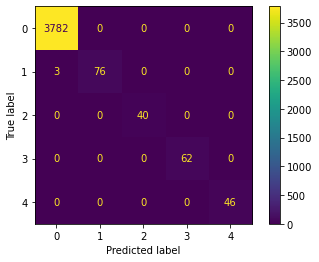

In [846]:
# Multiclass
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(k, y_pred)
    
#tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 
#fpr=fp/(fp+tn)
#print(" Fall out is " + str(fpr))

#fnr=fn/(fn+tp)
#print(" Miss rate is " + str(fnr))


In [650]:
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(y_train, y_pred)
    
#tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 
#fpr=fp/(fp+tn)
#print(" Fall out is " + str(fpr))

#fnr=fn/(fn+tp)
#print(" Miss rate is " + str(fnr))


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

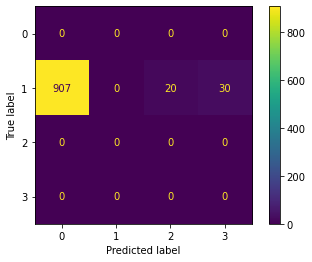

In [642]:
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(y_pred, y_test)
    
#tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 
#fpr=fp/(fp+tn)
#print(" Fall out is " + str(fpr))

#fnr=fn/(fn+tp)
#print(" Miss rate is " + str(fnr))


In [608]:
from sklearn import metrics

In [609]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

ValueError: multiclass format is not supported

In [610]:
fpr

0.0

In [611]:
tpr

array([0., 1., 1.])

In [612]:
thresholds

array([2, 1, 0])

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

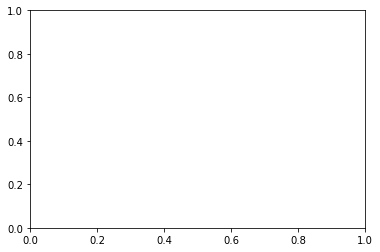

In [613]:
plt.plot(fpr,tpr)

 Fall out is 0.0
 Miss rate is 0.0


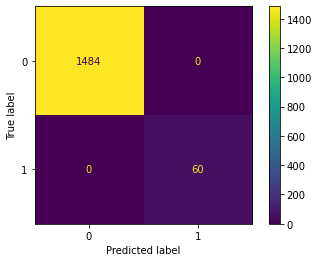

In [562]:
y_pred = model.predict_classes(X)
cm=confusion_matrix(y_pred, y)
    
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 
fpr=fp/(fp+tn)
print(" Fall out is " + str(fpr))

fnr=fn/(fn+tp)
print(" Miss rate is " + str(fnr))
